In [1]:
import nbsetup
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
from models.sparc.result import Result
from models.equations import velocity, null_gravity

In [2]:
standard_result = Result()

[None, None, None]

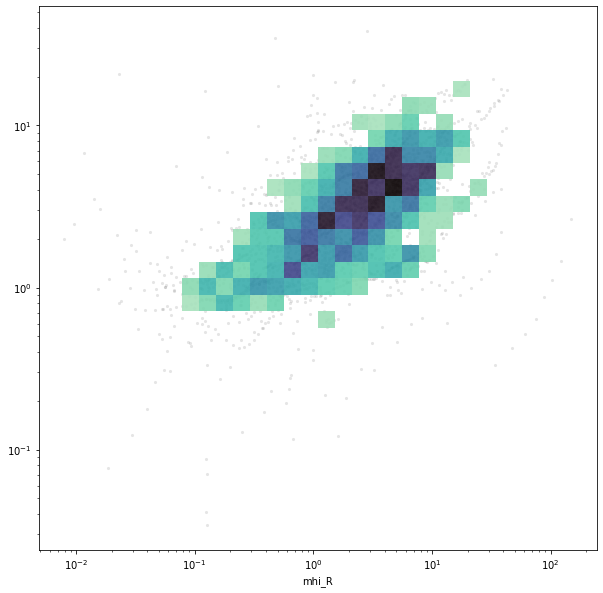

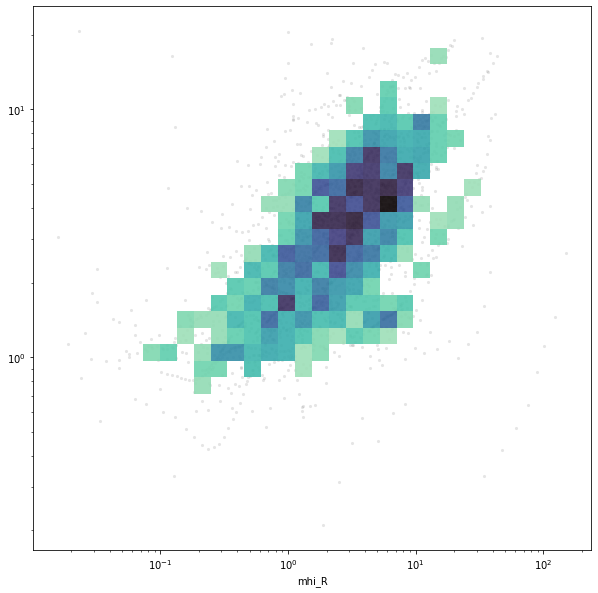

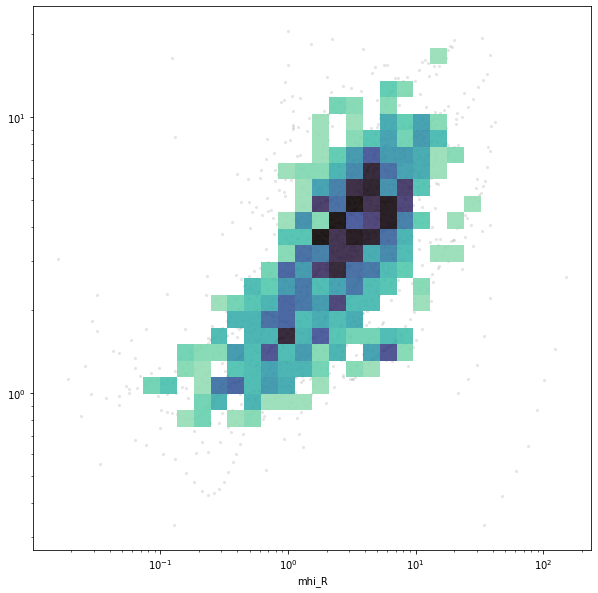

In [15]:
"""
OTHER CANDIDATES

Best so far is force*gamma*(epsilon**(nulled**alpha))
Logisitic function force/(1+e**(nulled**alpha + epsilon))

"""



def nulled_plot(df):
    fig, axes = plt.subplots(1,1, figsize=(10,10))
    x = df['mhi_R']
    y = df['gobs']/(1.78*df['Wgbar']/(x**(0.348)))
    y = df['gobs']/(df['Wgbar'])
    g = sns.scatterplot(data=df, x=x, y=y, color='black', s=10, alpha=0.1)
    g.set(xscale='log', yscale='log')
    sns.histplot(data=df, x=x, y=y, bins=30, pthresh=.1, cmap="mako_r", alpha=0.9)
    
    result = sp.stats.linregress(x, y)
    #sns.lineplot(x=x, y=result.slope*x+result.intercept, color='red').set(ylim=(0,None))
    #axes.axhline(y=1, color='orange')
    #print(result.intercept, result.slope)
    #sns.regplot(x=x, y=y, order=1, x_bins=20, color='orange')
    

[nulled_plot(d) for d in standard_result.datasets().values()]

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_62729/2948187162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[y] = (df['Fnulled'])
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_62729/2948187162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[y] = (df['Fnulled'])


[None, None, None]

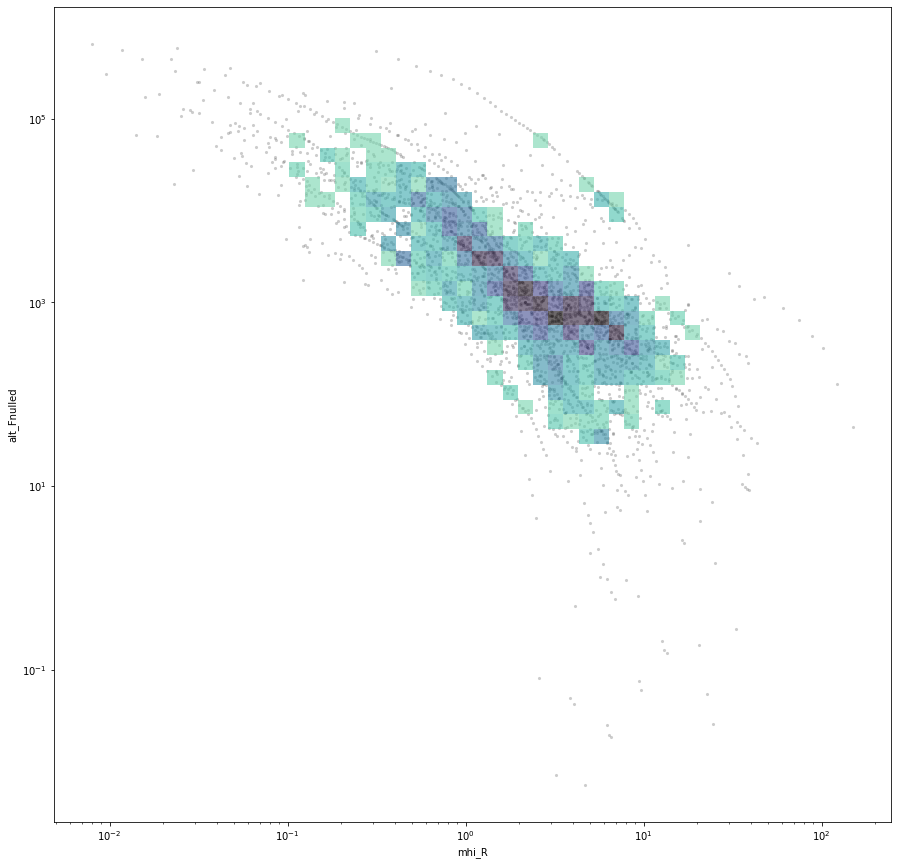

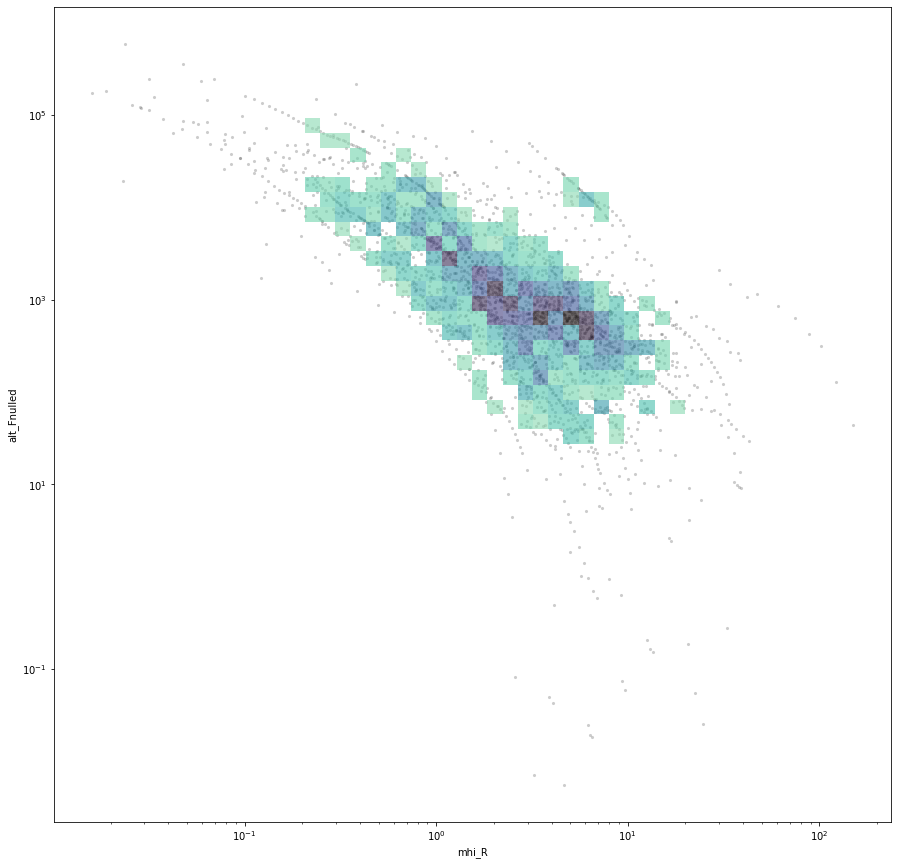

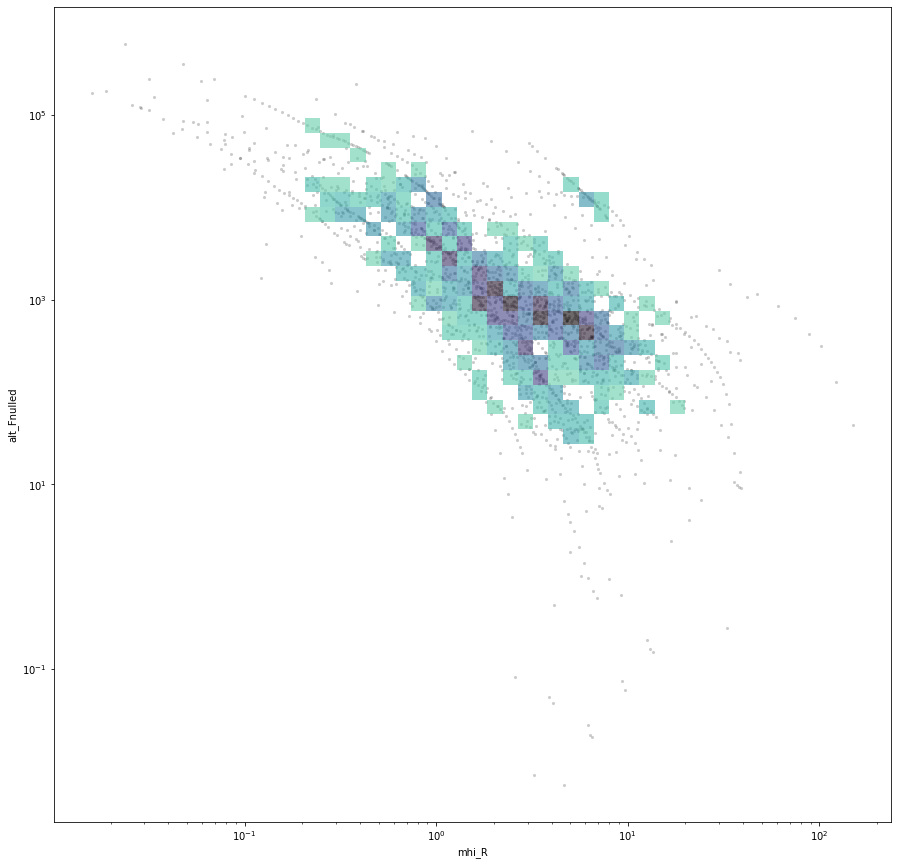

In [16]:
def relationship(df):
    x = 'mhi_R'
    y = 'alt_Fnulled'
    df[y] = (df['Fnulled'])
    fig, axes = plt.subplots(1, 1, figsize=(15,15))
    sns.scatterplot(data=df, x=x, y=y, color='black', s=10, alpha=0.2).set(xscale='log', yscale='log')
    sns.histplot(data=df, x=x, y=y, bins=50, pthresh=.2, cmap="mako_r", alpha=0.6)

[relationship(d) for d in standard_result.datasets().values()]

,check,r2,rslope,rstderr,rintercept
0,rel_R,0.044395,-0.207460,0.024138,1.106353
1,nulled,0.105283,0.089561,0.006548,0.752166
2,mhi_R,0.043373,-0.101027,0.011899,1.057074
3,R,0.131823,-0.182641,0.011755,1.131726
4,D,0.020011,-0.078784,0.013827,1.102178
5,MHI,0.013603,-0.046517,0.009934,1.033237


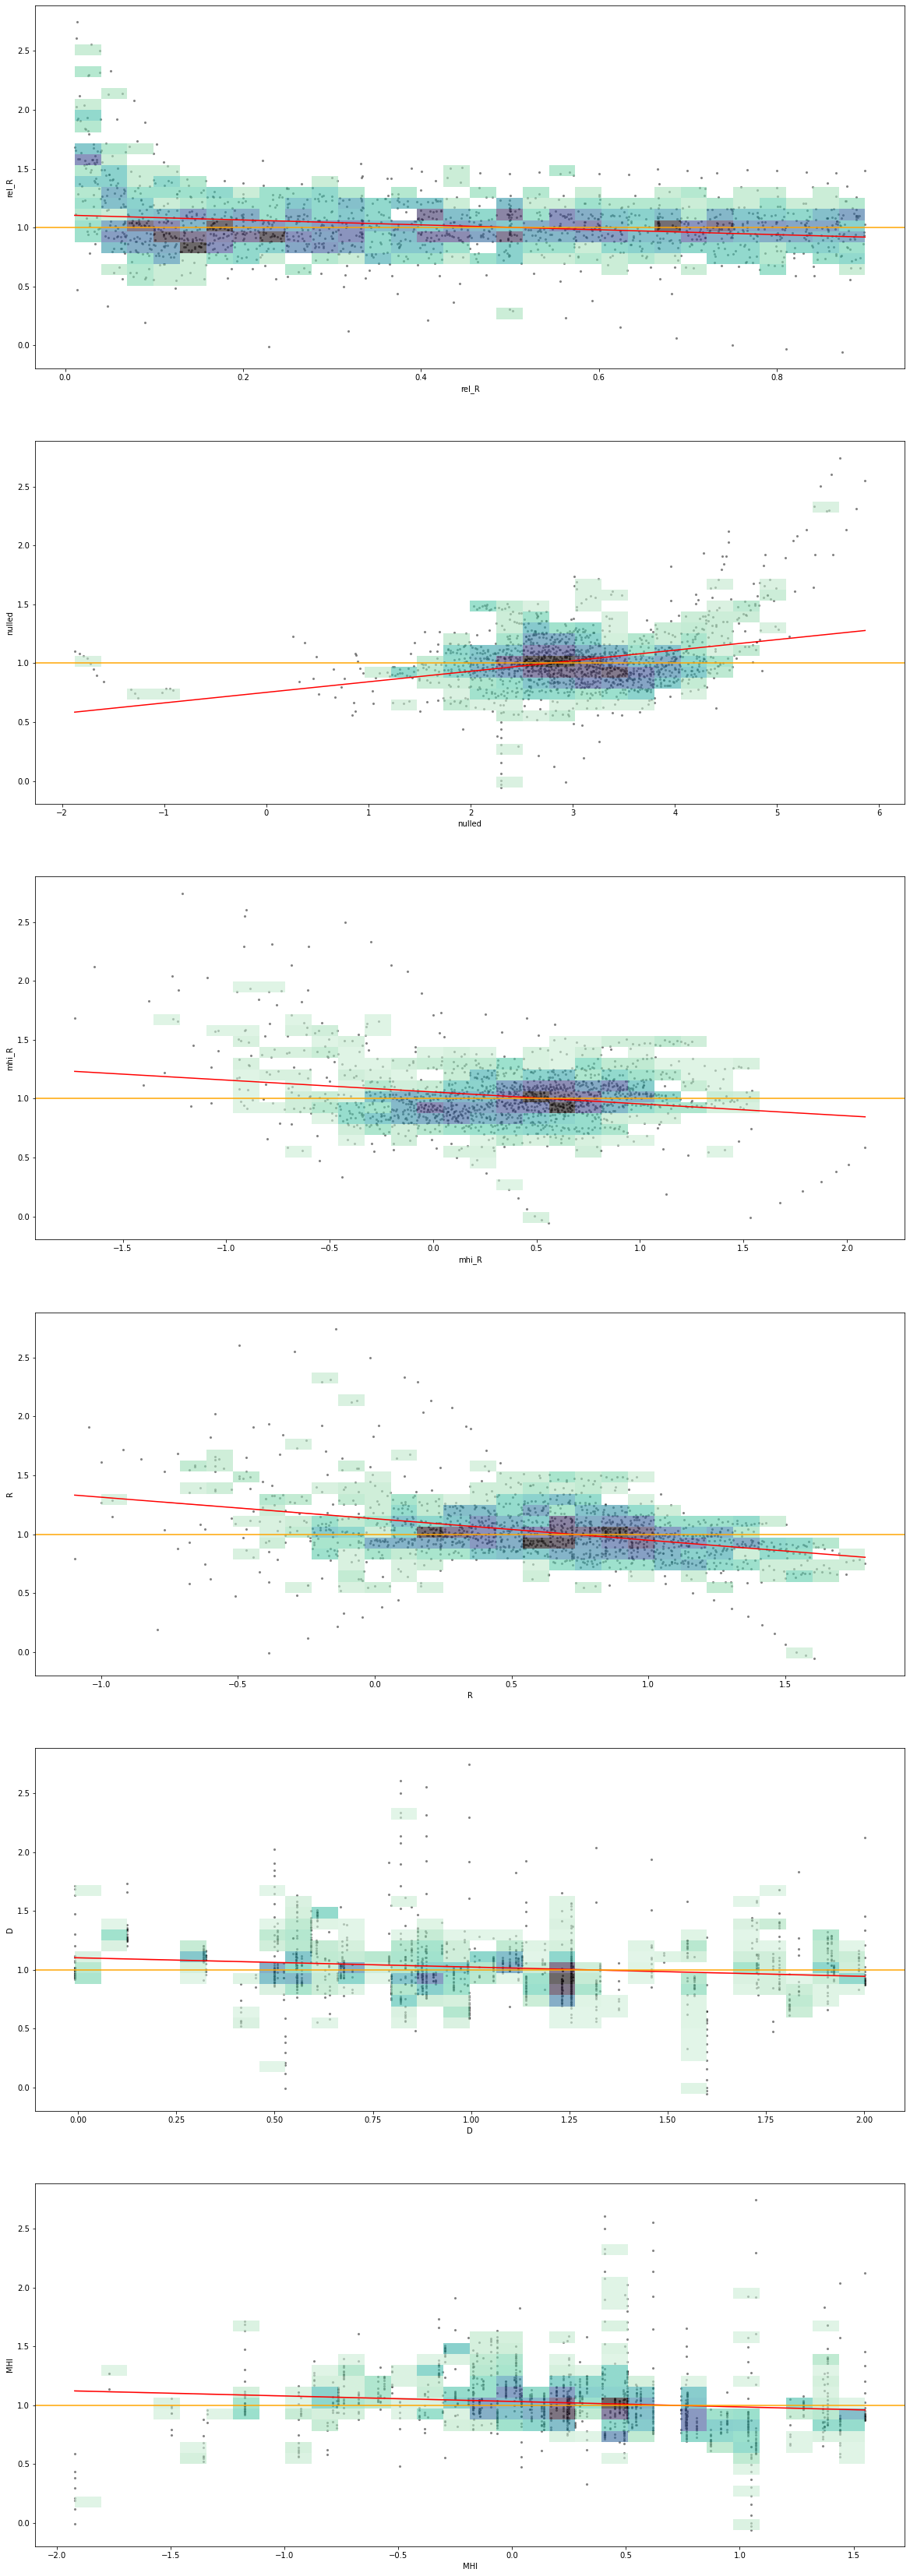

In [24]:
def residual_plots(df, iden='V', checks={'rel_R':1, 'nulled':0, 'mhi_R':0, 'R':0, 'D':0, 'MHI':0}):
    data = []
    fig, axes = plt.subplots(len(checks), 1, figsize=(20,10*len(checks)))
    for i, c in enumerate(checks.keys()):
        if checks[c]:
            x = df[c]
        else:
            x = np.log10(df[c])
        nulled = df['nulled']
        yprime = (1.8*df['W_gbar']*(0.6**(nulled**0.17)))
        #yprime = df['W_gbar']
        #yprime = 
        y = np.log10(df['gobs']/yprime)
        result = sp.stats.linregress(x, y)
        sns.scatterplot(x=x, y=y, color='black', s=10, alpha=0.5, ax=axes[i])
        sns.histplot(x=x, y=y, bins=30, pthresh=.05, cmap="mako_r", alpha=0.6, ax=axes[i])
        sns.lineplot(x=x, y=result.slope*x+result.intercept, color='red', ax=axes[i])
        axes[i].axhline(y=1, color='orange')
        data.append({
            'check': c,
            'r2': result.rvalue**2,
            'rslope': result.slope,
            'rstderr': result.stderr,
            'rintercept': result.intercept
        })
    
    return pd.DataFrame(data)

residual_plots(filtered_df)